In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import bt

In [2]:
portfolio = {
    'itot': 0.5,
    'acwi': 0.5
}
benchmark = {
    'acwi': 0.8,
    'agg': 0.2
}
start = '2012-12-31'

In [3]:
data = bt.get(','.join(portfolio.keys()), start=start)
data.head()

,itot,acwi
Date,,
2012-12-31,27.664440,43.446796
2013-01-02,28.328993,44.314281
2013-01-03,28.311953,44.124519
2013-01-04,28.461058,44.314281
2013-01-07,28.358816,44.133556


In [4]:
s = bt.Strategy('port', [
    bt.algos.RunMonthly(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**portfolio),
    bt.algos.Rebalance(),
    bt.algos.CapitalFlow(2000)
])

In [5]:
data_bm = bt.get(','.join(benchmark.keys()), start=start)

b = bt.Strategy('bm', [
    bt.algos.RunMonthly(),
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(**benchmark),
    bt.algos.Rebalance(),
    bt.algos.CapitalFlow(2000)
])

In [6]:
strat = bt.Backtest(s, data, initial_capital=3000)
bm = bt.Backtest(b, data_bm, initial_capital=3000)
res = bt.run(strat, bm)

port
0% [############################# ] 100% | ETA: 00:00:00bm
0% [############################# ] 100% | ETA: 00:00:00

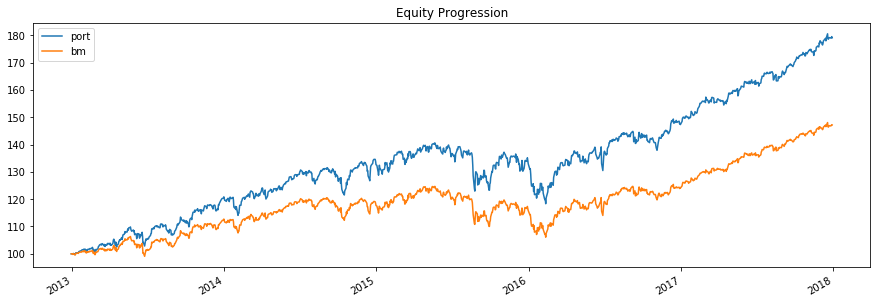

In [7]:
#plt.figure()
#port = res.plot()
#snp = plt.plot(data.ivv/data.ivv[0]*100)
#plt.legend()
#plt.show()
res.plot()

In [8]:
res.display()

Stat                 port        bm
-------------------  ----------  ----------
Start                2012-12-30  2012-12-30
End                  2017-12-29  2017-12-29
Risk-free rate       0.00%       0.00%

Total Return         79.08%      47.18%
Daily Sharpe         1.08        0.87
Daily Sortino        1.39        1.14
CAGR                 12.37%      8.04%
Max Drawdown         -15.85%     -14.93%
Calmar Ratio         0.78        0.54

MTD                  0.61%       0.49%
3m                   5.35%       3.81%
6m                   10.51%      8.28%
YTD                  21.56%      18.63%
1Y                   21.23%      18.53%
3Y (ann.)            9.99%       7.33%
5Y (ann.)            12.37%      8.04%
10Y (ann.)           12.37%      8.04%
Since Incep. (ann.)  12.37%      8.04%

Daily Sharpe         1.08        0.87
Daily Sortino        1.39        1.14
Daily Mean (ann.)    12.31%      8.17%
Daily Vol (ann.)     11.44%      9.38%
Daily Skew           -0.49       -0.54
Daily Kurt

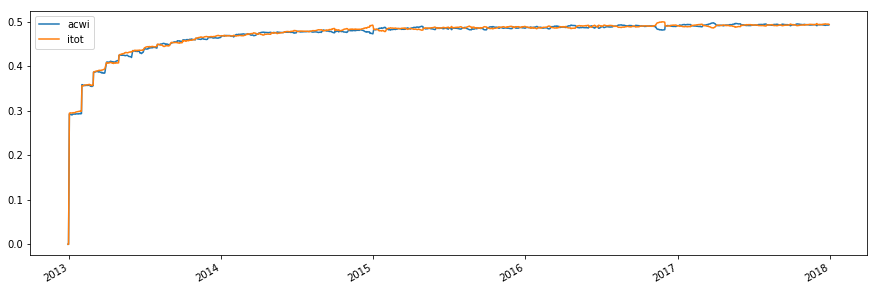

In [9]:
res.plot_security_weights()

In [10]:
res.get_transactions(strategy_name='port')

price  quantity
Date       Security                     
2013-01-02 acwi      44.314281      33.0
           itot      28.328993      52.0
2013-02-01 acwi      45.489010      23.0
           itot      29.415295      34.0
2013-03-01 acwi      45.082371      22.0
           itot      29.555876      33.0
2013-04-01 acwi      45.525154      23.0
           itot      30.615566      31.0
2013-05-01 acwi      46.781204      21.0
           itot      30.993786      34.0
2013-06-03 acwi      47.151695      23.0
           itot      32.231647      28.0
2013-07-01 acwi      46.050583      22.0
           itot      31.845684      30.0
2013-08-01 acwi      48.521496      21.0
           itot      33.749691      29.0
2013-09-03 acwi      47.221970      20.0
           itot      32.411270      33.0
2013-10-01 acwi      49.747803      20.0
           itot      33.880424      30.0
2013-11-01 acwi      51.285259      20.0
           itot      35.161724      28.0
2013-12-02 acwi      51.788586      21.0
           itot      36.007214      25.0
2014-01-02 acwi      52.411812      21.0
           itot      36.867439      25.0
2014-02-03 acwi      49.625130      21.0
           itot      35.115204      27.0
2014-03-03 acwi      52.614815      19.0
           itot      37.325306      26.0
...                        ...       ...
2016-09-01 itot      48.557430      24.0
2016-10-03 acwi      57.795780      15.0
           itot      48.491688      24.0
2016-11-01 acwi      56.453289      16.0
           itot      47.185883      23.0
2016-12-01 acwi      57.119633      35.0
2017-01-03 acwi      58.975201      17.0
           itot      51.045761      20.0
2017-02-01 acwi      60.251030      11.0
           itot      51.637939      25.0
2017-03-01 acwi      62.496105      23.0
           itot      54.253395      11.0
2017-04-03 acwi      62.555447       7.0
           itot      53.378414      29.0
2017-05-01 acwi      63.742268      14.0
           itot      54.250546      20.0
2017-06-01 acwi      65.512611      10.0
           itot      55.142494      25.0
2017-07-03 acwi      65.570000      16.0
           itot      55.311287      17.0
2017-08-01 acwi      67.500000       9.0
           itot      56.296680      25.0
2017-09-01 acwi      67.709999      14.0
           itot      56.436028      18.0
2017-10-02 acwi      68.900002      20.0
           itot      57.990002      11.0
2017-11-01 acwi      70.419998      12.0
           itot      58.990002      20.0
2017-12-01 acwi      71.540001      20.0
           itot      60.619999       9.0

[119 rows x 2 columns]